<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 1</span>
# <span style="color:green">Networks of Hyperlinked Wikipedia Pages</span>

<span style="font-size:large;">
    
* Here, in the beginning, one is selecting a Wikipedia page through a random generator of wikipedia pages.
    
* However, one may start with a predifined Wikipedia page of one's own choice. In this case, one needs to modify Cell 7 below.

* Subsequently, the goal is to find the set of hyperlinks of the original (random) page to other Wikipedia webpages and the graph (directed network) which is formed by all the hyperlinks among the latter webpages.

* To be able to controll the size of this graph, one should set the minimum and the maximum number of hyperlinks from the original (random) page into a fixed interval of values (parameters n and N below).

* At the very end, after running all cells of this notebook, what is plotted is the directed network among hyperlinked Wikipedia pages (alters), all of which are pointed from the randomly selected starting Wikipedia page (the ego). In other words, this is an example of the directed **alter-net** corresponding to a directed **ego-net**. 

In [1]:
# To install the wikipedia module, 
# you need to run the following (after commenting it out):

# !pip install wikipedia

In [2]:
# To install pygraphviz with conda, 
# you need to run the following IN A TERMINAL (after commenting it out):

# conda install -c alubbock pygraphviz

In [3]:
# To install pygraphviz with pip, 
# you need to run the following (after commenting it out):

# !pip install graphviz
# !pip install python-graphvis
# !pip install pygraphviz

In [4]:
import wikipedia
import random
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import warnings; warnings.simplefilter('ignore')

In [5]:
n=10  # minimum number of hyperlinks of the selected wikipedia page
N=31  # maximum number of hyperlinks of the selected wikipedia page

### Random Selection of a Wikipedia Page

In [6]:
# If this cell runs very slowly, take lower values of n and N.

while True:
    try:
        page=wikipedia.page(wikipedia.random())
    except wikipedia.DisambiguationError as e:
        pass
    except wikipedia.exceptions.PageError as e:
        pass
    hl=sorted([w.replace(" ","_") for w in page.links])
    if len(hl)>n and len(hl)<N:
        break
        
p=sorted([w.replace(" ","_") for w in page.links])

print "The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

The 30 hyperlinks from the (randomly) selected 'Brian Davidson (fighter)' Wikipedia page are:

1. 2009_in_Strikeforce
2. 2011_in_Shark_Fights
3. Bantamweight_(MMA)
4. Bellator_16
5. Bellator_26
6. Bellator_32
7. Bellator_MMA
8. Brazilian_Jiu-Jitsu
9. Brian_Davidson
10. Estevan_Payan
11. Fayetteville,_North_Carolina
12. Featherweight_(MMA)
13. Fight
14. Fort_Riley,_Kansas
15. Independence,_Missouri
16. Jens_Pulver
17. Kansas_City,_Missouri
18. Krav_Maga
19. Lee's_Summit,_Missouri
20. Missouri
21. Mixed_martial_artist
22. Mixed_martial_arts
23. Mobile,_Alabama
24. Sherdog
25. Strikeforce_(mixed_martial_arts)
26. Strikeforce_Challengers:_Woodley_vs._Bears
27. Tae_Kwon_Do
28. Titan_Fighting_Championship
29. UFC_Lightweight_Championship
30. United_States


### Using a Predefined Wikipedia Page

In [7]:
# # IF ONE WANTS TO USE A PREDEFINED WEBPAGE, 
# # one should uncomment and run the following lines
# # Here, I've considered as predefined Wikipedia page the page of the
# # 'United_States_women%27s_national_soccer_team' but you may take
# # instead anything you like. Notice, that subsequently I am filtering
# # a random sample of 20 hyperlinks. This might need to change if the
# # page you have selected has fewer hyperlinks.

# page=wikipedia.page('United_States_women%27s_national_soccer_team') #'https://en.wikipedia.org/wiki/United_States_women%27s_national_soccer_team'

# p=random.sample(sorted([w.replace(" ","_") for w in page.links]),20)

# print "The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are:" %(len(p),page.title)
# print
# for i in range(len(p)):
#     print "%i. %s" %(i+1,p[i])

In [8]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
        print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
        print
        for q in ih:
            eds.append((pp,q))

2009_in_Strikeforce has 3 hyperlinks to webpages: 
 Sherdog, Mixed_martial_arts, Strikeforce_(mixed_martial_arts)

2011_in_Shark_Fights has 3 hyperlinks to webpages: 
 Independence,_Missouri, Sherdog, Mixed_martial_arts

Bantamweight_(MMA) has 4 hyperlinks to webpages: 
 United_States, Mixed_martial_arts, Featherweight_(MMA), Bellator_MMA

Bellator_16 has 3 hyperlinks to webpages: 
 United_States, Mixed_martial_arts, Bellator_MMA

Bellator_26 has 3 hyperlinks to webpages: 
 United_States, Mixed_martial_arts, Bellator_MMA

Bellator_32 has 5 hyperlinks to webpages: 
 United_States, Bantamweight_(MMA), Mixed_martial_arts, Strikeforce_(mixed_martial_arts), Featherweight_(MMA)

Bellator_MMA has 6 hyperlinks to webpages: 
 United_States, Bantamweight_(MMA), Strikeforce_(mixed_martial_arts), Featherweight_(MMA), Mixed_martial_arts, Bellator_32

Brazilian_Jiu-Jitsu has 2 hyperlinks to webpages: 
 Mixed_martial_arts, Krav_Maga

Estevan_Payan has 9 hyperlinks to webpages: 
 Mobile,_Alabama, Unit

In [9]:
# In case you could not install pygraphviz, replace the command bellow:
# pos=graphviz_layout(G)
# by 
# pos=nx.spring_layout(G,k)
# where you set k equal to 1. or any float less or larger that 1.
# Try a few assignments of k until you find the plot that looks more satisfactory.

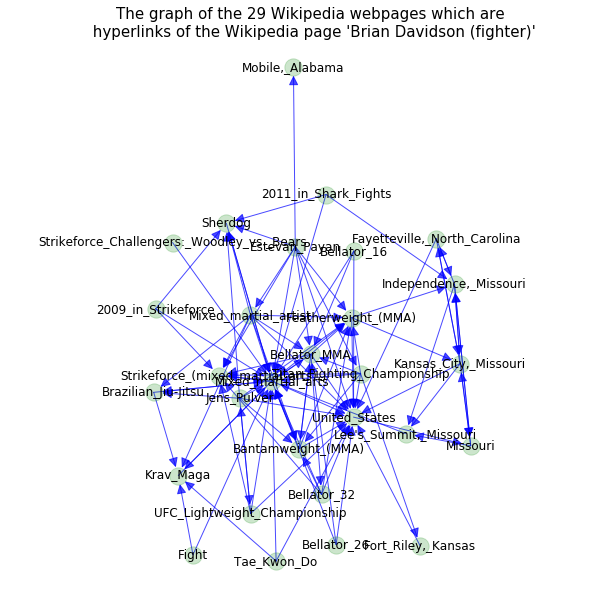

In [10]:
G=nx.DiGraph()
G.add_edges_from(eds)
# print len(G.nodes()),len(G.edges())

pos=graphviz_layout(G)

# pos=nx.spring_layout(G,1.)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0) 